96.0810756252543
123


C:\Users\Mithun\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


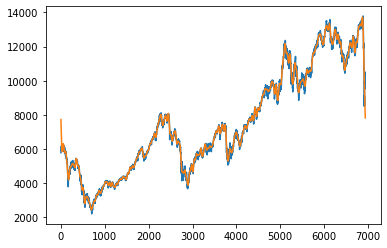

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
import pandas as pd
from numpy import loadtxt
from scipy.spatial import distance


dax_data = np.loadtxt("dax_data.txt", comments="#", delimiter="\n")
plt.plot(dax_data)

coef_array = np.fft.fft(dax_data)
# print('coef array ', coef_array)
time_step = 1

sample_freq = fft.fftfreq(dax_data.size, time_step)
amplitude = np.abs(coef_array)
# print('amplitude ', amplitude)

amp_freq = np.array([amplitude,sample_freq])
# print('amp freq', amp_freq)

max_amp_position_array = np.argsort(amp_freq[0,:])[::-1] #[0,:] taking all value of first array from 2D arrray  
#argsort -> positionwise sorting of an array 
# print('maps', max_amp_position_array)

peak_freq = amp_freq[1,max_amp_position_array[0]]
# print('Peak freq', peak_freq)

def approximation(num_coef):
    copy_coef = coef_array.copy()
    copy_coef[np.abs(sample_freq) > amp_freq[1,max_amp_position_array[num_coef-1]]]  = 0
    print('check coef: ', copy_coef)
    filtered_sig = np.fft.ifft(copy_coef)
    plt.plot(filtered_sig)
    
    
def average_difference(approximate_data):
    dist = distance.euclidean(dax_data , approximate_data)/dax_data.size
    return dist
    
def best_approximation(difference):
    counter = 0
    iteration = 0
    while counter < dax_data.size:
        copy_coef = coef_array.copy()
        copy_coef[np.abs(sample_freq) > amp_freq[1,max_amp_position_array[counter]]]  = 0
        filtered_data = np.fft.ifft(copy_coef)
        average = np.abs(average_difference(filtered_data))
        if average > 1.95:
            counter += 1
        else:
            plt.plot(filtered_data)
            break
            
    print(counter)
    

# # #with 10 coeffecient
# high_freq_fft = coef_array.copy()
# high_freq_fft[np.abs(sample_freq) > amp_freq[1,max_amp_position_array[10]]]  = 0
# filtered_sig = np.fft.ifft(high_freq_fft)
# plt.plot(filtered_sig


# approximation(1)
# approximation(5)
# approximation(10)

best_approximation(100)

# a = [1,2,3] 
# b= [12,123,3,5]
# c = np.array([a,b])
# # print(c[0])
# # print(c[0][1])
# print(c)

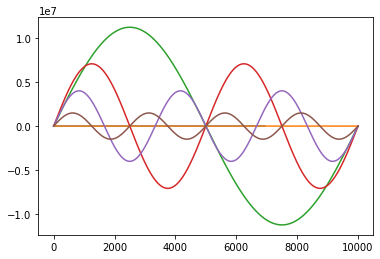

In [44]:
def create_signal(num_sig):
    i = 0
    while i<num_sig:
        n = 10000
        lx = 10
        omg = 2*np.pi/lx
        x = np.linspace(0,lx,n)
        amp = amp_freq[0][i]
        freq = amp_freq[1][i]
        signal = amp*np.sin(omg*i*x)
        plt.plot(signal)
        i += 1

create_signal(5)